In [1]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d dhamur/cotton-plant-disease

100%|██████████| 35.5M/35.5M [00:00<00:00, 175MB/s] 


In [2]:
!unzip cotton-plant-disease.zip

Archive:  cotton-plant-disease.zip
  inflating: Cotton plant disease/Aphids edited/1.jpg  
  inflating: Cotton plant disease/Aphids edited/10.jpg  
  inflating: Cotton plant disease/Aphids edited/11.jpg  
  inflating: Cotton plant disease/Aphids edited/13.jpg  
  inflating: Cotton plant disease/Aphids edited/14.jpg  
  inflating: Cotton plant disease/Aphids edited/15.jpg  
  inflating: Cotton plant disease/Aphids edited/16.jpg  
  inflating: Cotton plant disease/Aphids edited/17.jpg  
  inflating: Cotton plant disease/Aphids edited/18.jpg  
  inflating: Cotton plant disease/Aphids edited/19.jpg  
  inflating: Cotton plant disease/Aphids edited/2.jpg  
  inflating: Cotton plant disease/Aphids edited/20.jpg  
  inflating: Cotton plant disease/Aphids edited/21.jpg  
  inflating: Cotton plant disease/Aphids edited/22.jpg  
  inflating: Cotton plant disease/Aphids edited/23.jpg  
  inflating: Cotton plant disease/Aphids edited/24.jpg  
  inflating: Cotton plant disease/Aphids edited/25.jpg 

In [3]:
!ls

'Cotton plant disease'	 cotton-plant-disease.zip   drive   sample_data


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

In [5]:
data_gen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2,
)

In [9]:
train_set = data_gen.flow_from_directory(
    'Cotton plant disease/',
    target_size=(120, 120),
    class_mode='binary',
    subset='training',
    seed=437
)

Found 192 images belonging to 6 classes.


In [11]:
valid_set = data_gen.flow_from_directory(
    'Cotton plant disease/',
    target_size=(120, 120),
    class_mode='binary',
    subset='validation',
    seed=437
)

Found 45 images belonging to 6 classes.


In [18]:
import numpy as np


In [38]:
len(valid_set[0][0][0])

120

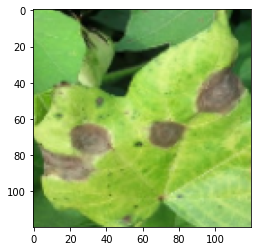

In [37]:
import matplotlib.pyplot as plt

plt.imshow(valid_set[0][0][0])


In [39]:
valid_set.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5], dtype=int32)

In [40]:
len(valid_set.classes)

45

In [48]:
model = models.Sequential()

model.add(layers.Conv2D(input_shape=(120, 120, 3), kernel_size=3, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(kernel_size=3, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(kernel_size=3, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(240, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 57, 57, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)      

In [49]:
history = model.fit(x=train_set, batch_size=32, epochs=11, validation_data=valid_set)

Epoch 1/11
6/6 [==============================] - 4s 562ms/step - loss: 1.8299 - accuracy: 0.1562 - val_loss: 1.7802 - val_accuracy: 0.1556
Epoch 2/11
6/6 [==============================] - 3s 449ms/step - loss: 1.7589 - accuracy: 0.2188 - val_loss: 1.7472 - val_accuracy: 0.2444
Epoch 3/11
6/6 [==============================] - 3s 460ms/step - loss: 1.6832 - accuracy: 0.2812 - val_loss: 1.6744 - val_accuracy: 0.3556
Epoch 4/11
6/6 [==============================] - 3s 466ms/step - loss: 1.6260 - accuracy: 0.3385 - val_loss: 1.6372 - val_accuracy: 0.3111
Epoch 5/11
6/6 [==============================] - 3s 463ms/step - loss: 1.4397 - accuracy: 0.4427 - val_loss: 1.5310 - val_accuracy: 0.3778
Epoch 6/11
6/6 [==============================] - 3s 441ms/step - loss: 1.3552 - accuracy: 0.4792 - val_loss: 1.4105 - val_accuracy: 0.4889
Epoch 7/11
6/6 [==============================] - 3s 450ms/step - loss: 1.1396 - accuracy: 0.5833 - val_loss: 1.4211 - val_accuracy: 0.4667
Epoch 8/11
6/6 [====

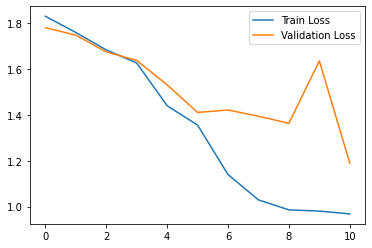

In [53]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

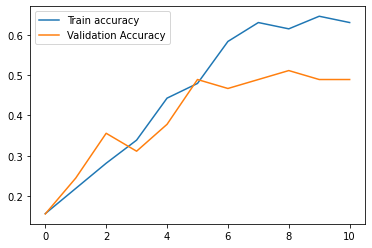

In [56]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()